In [2]:
#importing necessary packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import numpy as np

In [4]:
data = pd.read_csv('Skin_NonSkin.txt',header=None,skipinitialspace=True)
data.shape

(245057, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
0    245057 non-null int64
1    245057 non-null int64
2    245057 non-null int64
3    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [6]:
data.columns = ['B','G','R','Category']

In [60]:
# data.fillna(method='bfill')
# data.fillna(method='ffill') #copy data from previous top data

# data.head()

In [10]:
X = data.iloc[:,:-1]
y = data.Category

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                  random_state=10)

In [143]:
#Defining and fitting
model = DecisionTreeClassifier(max_depth=27,criterion='gini',random_state=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=27,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

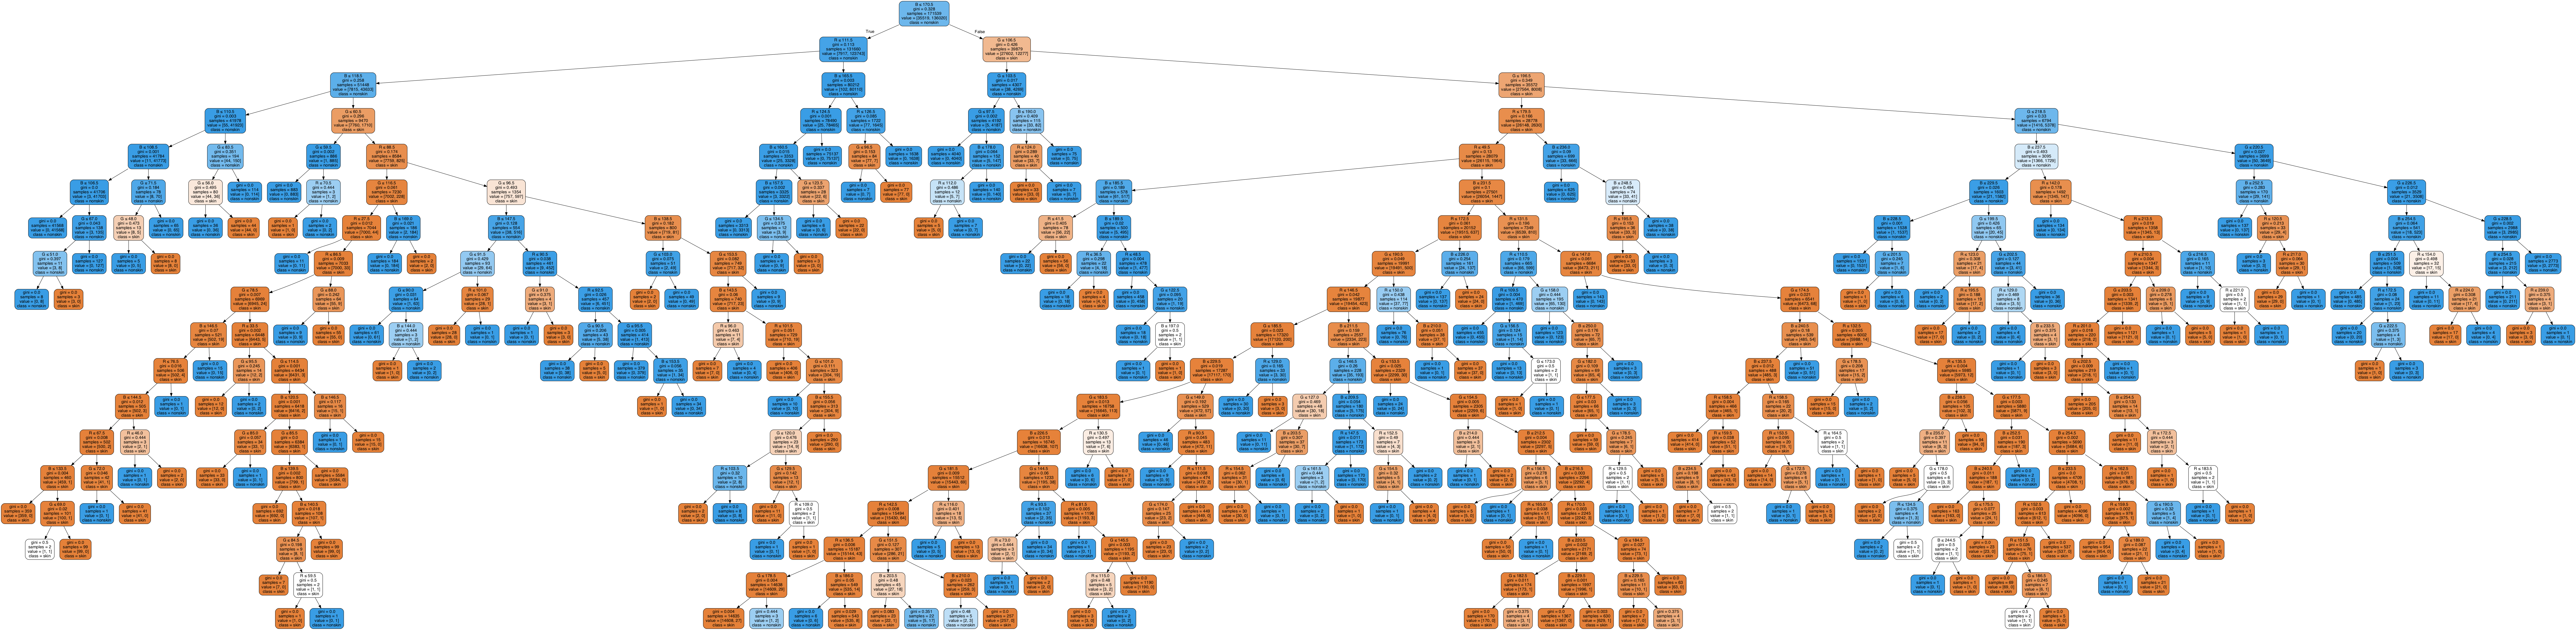

In [76]:
#Visualizing
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, 
                feature_names = X_train.columns,
                class_names=['skin','nonskin'],
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [144]:
from collections import Counter
Counter(data.loc[data.Category<5.0,'Category'])

Counter({1: 50859, 2: 194198})

In [145]:
y_predict = model.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.9991974754481896


col_0         1      2
Category              
1         15314     26
2            33  58145

In [ ]:
# 1 - ((50/104)**2+(48/104)**2+(6/104)**2)

In [ ]:
# 1 - ((10/90)**2+(40/90)**2+(40/90)**2)

In [15]:
# 1 - ((50/70)**2+(10/70)**2+(10/70)**2)